# Simple Linear Regression- Delivery time dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
df.columns="Delivery_Time","Sorting_Time"

In [21]:
df.shape

(21, 2)

In [22]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [24]:
df.describe()
# the avg delivery time is 16.8 min, maximum time is 29 min and minimum time is 8 min.

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,2.774787,6.190476
std,0.318219,2.542028
min,2.079442,2.000000
25%,2.602690,4.000000
50%,2.880882,6.000000
75%,2.983153,8.000000
max,3.367296,10.000000


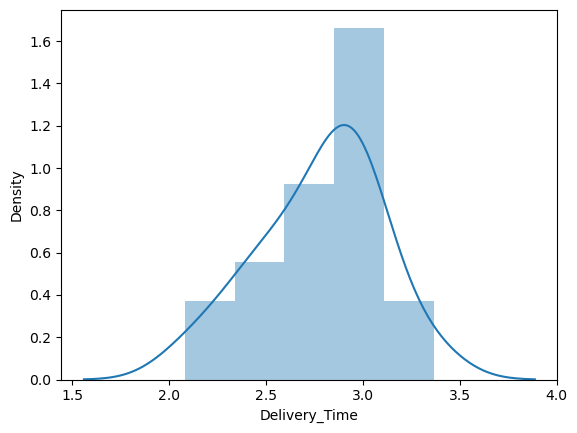

In [32]:
sns.distplot(df["Delivery_Time"])
plt.show()
# data is right skewed

In [ ]:
sns.distplot(df["Sorting_Time"])
plt.show()
# data is normally distribution

In [ ]:
df["Delivery_Time"]=np.log(df["Delivery_Time"])

In [ ]:
sns.distplot(df["Delivery_Time"])
plt.show()
# data become normally distributed

In [ ]:
sns.boxplot(df["Delivery_Time"])
plt.show()

In [ ]:
sns.boxplot(df["Sorting_Time"])
plt.show()

In [ ]:
sns.scatterplot(x=df["Delivery_Time"],y=df["Sorting_Time"],color="r")
plt.show()

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt="0.02f")
plt.show()
# from this graph, we can see that both columns have strong positive correlation because 
# value of correlation coefficient is 0.84 > 0.8 .

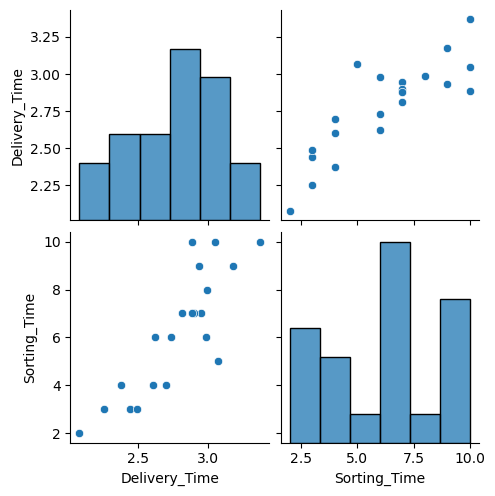

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
import statsmodels.formula.api as smf

In [29]:
model=smf.ols("Sorting_Time ~ Delivery_Time",data=df).fit()

In [30]:
model.summary()
# R-sqarred=0.711<0.85,model is not good
# p=00<0.05 hence acceptable
# bita-0=-12.4992 
# bita-1=6.7355

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.59e-06
Time:                        19:48:23   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -12.4992      2.751     -4.543      0.000     -18.257      -6.741
Delivery_Time     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred=model.predict(df["Delivery_Time"])
pred.head()

0     8.007296
1     5.031310
2     7.593942
3     8.906703
4    10.181351
dtype: float64

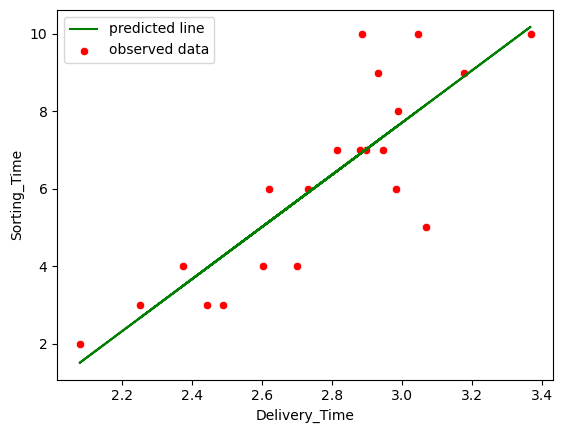

In [34]:
plt.plot(df["Delivery_Time"],pred,"g")
sns.scatterplot(x=df["Delivery_Time"],y=df["Sorting_Time"],color="r")
plt.legend(["predicted line","observed data"])
plt.show()

In [36]:
# Error calculation'
residual=df["Delivery_Time"] - pred
np.mean(residual)

-3.415689681647061

In [37]:
residual_sqr = residual*residual
MSE=np.mean(residual_sqr)
RMSE=np.sqrt(MSE)
RMSE

3.8522096366361382